<a href="https://colab.research.google.com/github/chintamaneni11905158/ml/blob/main/denoisemain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Activation
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from sklearn.metrics import accuracy_score


In [ ]:
# Load the image and add noise
image = plt.imread('carr.jpeg') / 255.
noisy_image = np.clip(image + np.random.normal(0, 0.5, image.shape), 0, 1)


Text(0.5, 1.0, 'Noisy')

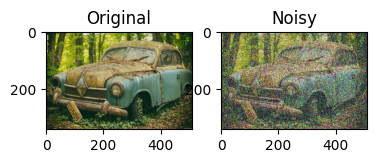

In [ ]:
plt.subplot(131)
plt.imshow(image)
plt.title('Original')
plt.subplot(132)
plt.imshow(noisy_image)
plt.title('Noisy')


In [ ]:
# Define the model
#input_shape = noisy_image.shape
input_shape = (None, None, 3)
inputs = Input(shape=input_shape)
x = Conv2D(512, (3, 3), padding='same')(inputs)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(3, (3, 3), padding='same')(x)
outputs = Activation('sigmoid')(x)
model = Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
epochs = 10000
batch_size = 16
history = model.fit(noisy_image.reshape((1,)+noisy_image.shape), image.reshape((1,)+image.shape), 
                    batch_size=batch_size, epochs=epochs)

In [ ]:
# Generate denoised image
denoised_image = model.predict(noisy_image.reshape((1,)+noisy_image.shape)).squeeze()

1/1 [==============================] - 0s 134ms/step


In [ ]:
model.save('deoisemai.h5')

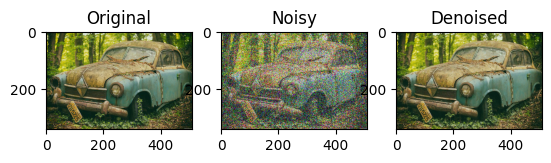

In [ ]:
# Plot the results
plt.subplot(131)
plt.imshow(image)
plt.title('Original')
plt.subplot(132)
plt.imshow(noisy_image)
plt.title('Noisy')
plt.subplot(133)
plt.imshow(denoised_image)
plt.title('Denoised')
plt.show()

In [ ]:

mse=np.mean((noisy_image - denoised_image)**2)
max_pixel = 255.0
psnr=20*np.log10(max_pixel/np.sqrt(mse))


print("mse ",mse)
print("psnr ",psnr,"db")


mse  0.12105949066325812
psnr  57.30081518505996 db


In [ ]:
img = plt.imread('noisy_image.jpg') / 255.
#noisy_image = np.clip(image + np.random.normal(0, 0.3, image.shape), 0, 1)
noise_img = np.clip(img + np.random.normal(0, 0, img.shape), 0, 1)
denoise_img = model.predict(noise_img.reshape((1,)+noise_img.shape)).squeeze()

1/1 [==============================] - 40s 40s/step


In [ ]:
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(denoise_img)

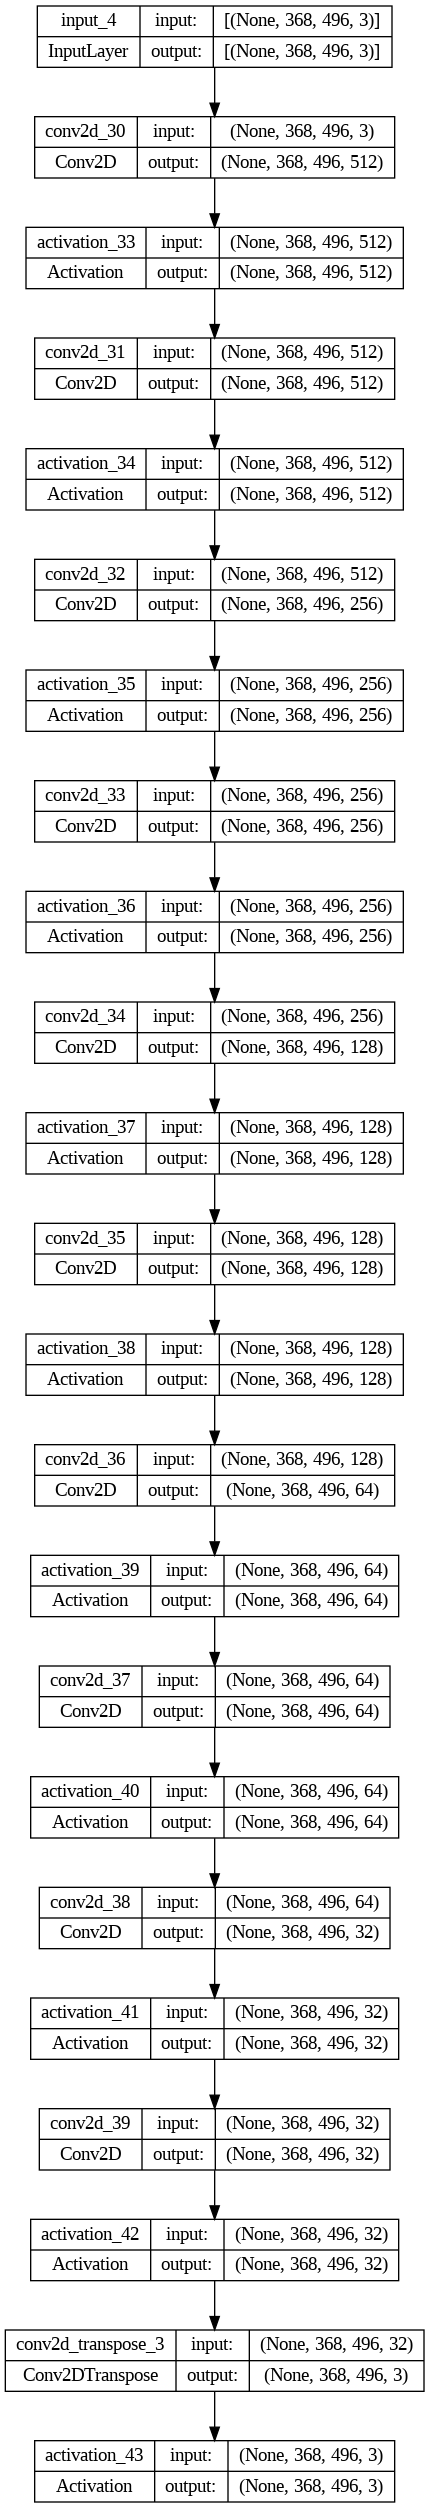

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)